In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
from joblib import Parallel, delayed,parallel_backend

In [139]:
import sys
del sys.modules["test"]

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

data.npy already exist


In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [6]:
np.shape(data)

(200, 400, 640)

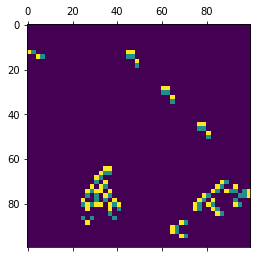

In [7]:
plt.matshow(data[-1,150:250,270:370])

In [8]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:,150:250,270:370],neighborhood,2,-1)

1
2
34

5
67

8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
2728

29
3031

32
33
34
3536

37
3839

40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
7071

72
73
7475

76
77
7879

80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
9899

100
101
102103

104
105
106
107
108
109
110111

112
113
114115116


117
118
119120

121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154155

156
157
158159

160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187188

189
190
191
192
193
194
195
196
197
198
199


In [9]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [10]:
modelGGA.run()

config saved at saves/Experiment1/29_01_20_23_05_33/config.json
iteration 1
goal = 1goal = 2goal = 3


goal 1 elapsed time: 0.6349997520446777
goal 2 elapsed time: 0.6669976711273193goal 3 elapsed time: 0.6669960021972656

iteration 2
goal = 1goal = 2
goal = 3

goal 3 elapsed time: 0.09400177001953125goal 2 elapsed time: 0.10799884796142578
goal 1 elapsed time: 0.11900186538696289

iteration 3
goal = 1goal = 2goal = 3


goal 2 elapsed time: 0.08999848365783691goal 3 elapsed time: 0.09699749946594238

goal 1 elapsed time: 0.11699914932250977
iteration 4
goal = 1goal = 2goal = 3


goal 3 elapsed time: 0.09299659729003906goal 2 elapsed time: 0.0969991683959961
goal 1 elapsed time: 0.11600351333618164

iteration 5
goal = 1
goal = 2goal = 3

goal 1 elapsed time: 0.07899856567382812
goal 3 elapsed time: 0.10299968719482422
goal 2 elapsed time: 0.11199808120727539
iteration 6
goal = 1goal = 2
goal = 3

goal 2 elapsed time: 0.08699631690979004
goal 1 elapsed time: 0.10799908638000488
goal 3 el

In [11]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [13]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [14]:
modelOCAT.train()

training for value 1
124
31
31
29
29
29
29
29
29
27
27
25
24
24
24
22
22
21
21
21
20
20
20
20
20
20
20
20
20
20
difficult element 100/1000 to delete it
20
19
19
19
19
19
18
17
17
17
17
17
17
17
17
17
15
13
12
12
12
12
12
12
10
10
10
10
10
10
10
10
10
10
difficult element 100/1000 to delete it
10
9
8
8
8
7
7
7
6
5
5
3
2
1
training for value 2
182
138
106
99
82
41
36
18
18
15
14
13
10
8
6
5
3
2
training for value 3
244
228
152
117
99
93
87
84
80
76
73
68
50
46
42
40
40
34
32
30
29
27
26
23
22
21
19
17
16
15
15
14
14
12
12
12
12
12
12
12
12
12
12
difficult element 100/1000 to delete it
12
11
9
8
8
7
7
6
6
6
5
5
4
3
2
1


[[1,
  [{(4, 3, '<')},
   {(1, 3, '>='), (2, 2, '>='), (4, 2, '>='), (5, 3, '<'), (8, 2, '<')},
   {(4, 2, '>='), (5, 3, '<'), (7, 2, '<'), (8, 2, '>=')},
   {(0, 3, '<'), (1, 3, '>='), (2, 2, '<'), (3, 2, '<'), (4, 2, '>=')},
   {(0, 2, '<'), (0, 3, '>='), (2, 3, '<'), (4, 2, '>='), (6, 3, '<')},
   {(3, 2, '>='),
    (4, 2, '>='),
    (5, 3, '>='),
    (6, 3, '<'),
    (8, 2, '<'),
    (8, 3, '<')},
   {(4, 2, '>='), (5, 3, '<'), (7, 2, '<'), (7, 3, '<'), (8, 3, '>=')},
   {(0, 2, '<'), (0, 3, '>='), (2, 2, '<'), (4, 2, '>='), (6, 3, '<')},
   {(0, 3, '<'),
    (2, 2, '<'),
    (4, 2, '>='),
    (6, 2, '<'),
    (6, 3, '>='),
    (7, 3, '>=')},
   {(3, 2, '>='), (4, 2, '>='), (6, 3, '<'), (7, 2, '<'), (7, 3, '>=')},
   {(4, 2, '>='), (5, 3, '<'), (8, 2, '>=')},
   {(0, 2, '<'), (3, 3, '>='), (4, 2, '>='), (6, 2, '<'), (8, 3, '<')},
   {(0, 2, '<'), (3, 3, '>='), (4, 2, '>='), (6, 3, '<')},
   {(0, 3, '<'), (4, 2, '>='), (6, 2, '<'), (6, 3, '>='), (7, 3, '<')},
   {(0, 3, '>='),
    (

In [15]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 1797779, 2: 48702, 3: 14677}, {1: 34085, 3: 15953})

In [16]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [17]:
data= np.load("data/data.npy")
data = data[:,150:250,270:370]
data=np.array(data)

Testing:
state 1/200
Static : 9477/9532
Dynamic : 0/468
state 2/200
Static : 9476/9528
Dynamic : 0/472
state 3/200
Static : 9458/9508
Dynamic : 0/492
state 4/200
Static : 9433/9488
Dynamic : 0/512
state 5/200
Static : 9410/9472
Dynamic : 0/528
state 6/200
Static : 9411/9472
Dynamic : 0/528
state 7/200
Static : 9392/9452
Dynamic : 0/548
state 8/200
Static : 9386/9444
Dynamic : 0/556
state 9/200
Static : 9349/9428
Dynamic : 0/572
state 10/200
Static : 9376/9444
Dynamic : 0/556
state 11/200
Static : 9394/9468
Dynamic : 0/532
state 12/200
Static : 9424/9492
Dynamic : 0/508
state 13/200
Static : 9444/9504
Dynamic : 0/496
state 14/200
Static : 9448/9508
Dynamic : 0/492
state 15/200
Static : 9446/9504
Dynamic : 0/496
state 16/200
Static : 9441/9496
Dynamic : 0/504
state 17/200
Static : 9405/9472
Dynamic : 0/528
state 18/200
Static : 9395/9464
Dynamic : 0/536
state 19/200
Static : 9394/9464
Dynamic : 0/536
state 20/200
Static : 9405/9468
Dynamic : 0/532
state 21/200
Static : 9396/9464
Dynamic 

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

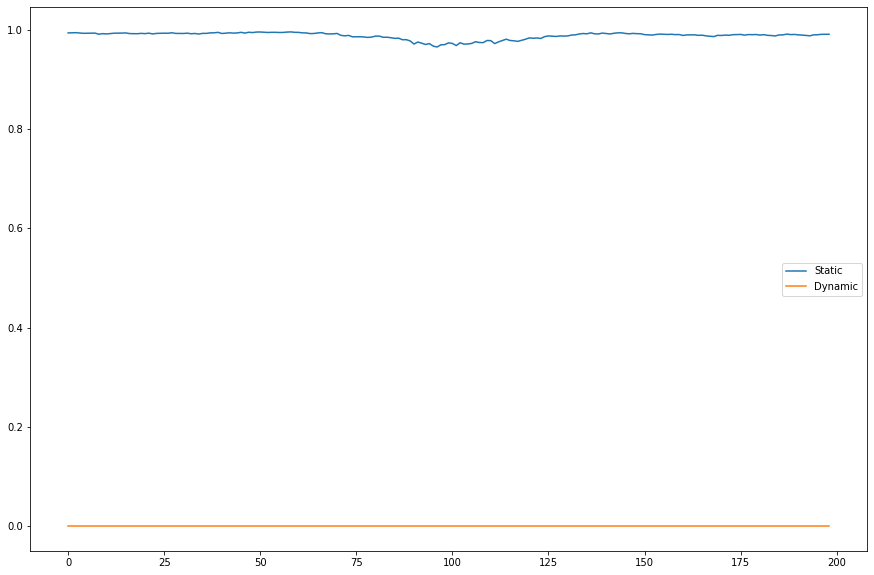

In [18]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/200
Static : 9519/9532
Dynamic : 44/468
state 2/200
Static : 9513/9528
Dynamic : 39/472
state 3/200
Static : 9496/9508
Dynamic : 50/492
state 4/200
Static : 9468/9488
Dynamic : 48/512
state 5/200
Static : 9458/9472
Dynamic : 52/528
state 6/200
Static : 9452/9472
Dynamic : 50/528
state 7/200
Static : 9437/9452
Dynamic : 47/548
state 8/200
Static : 9427/9444
Dynamic : 53/556
state 9/200
Static : 9407/9428
Dynamic : 53/572
state 10/200
Static : 9421/9444
Dynamic : 51/556
state 11/200
Static : 9447/9468
Dynamic : 53/532
state 12/200
Static : 9474/9492
Dynamic : 43/508
state 13/200
Static : 9490/9504
Dynamic : 44/496
state 14/200
Static : 9493/9508
Dynamic : 38/492
state 15/200
Static : 9487/9504
Dynamic : 48/496
state 16/200
Static : 9480/9496
Dynamic : 45/504
state 17/200
Static : 9453/9472
Dynamic : 41/528
state 18/200
Static : 9444/9464
Dynamic : 49/536
state 19/200
Static : 9448/9464
Dynamic : 46/536
state 20/200
Static : 9456/9468
Dynamic : 50/532
state 21/200
Static 

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

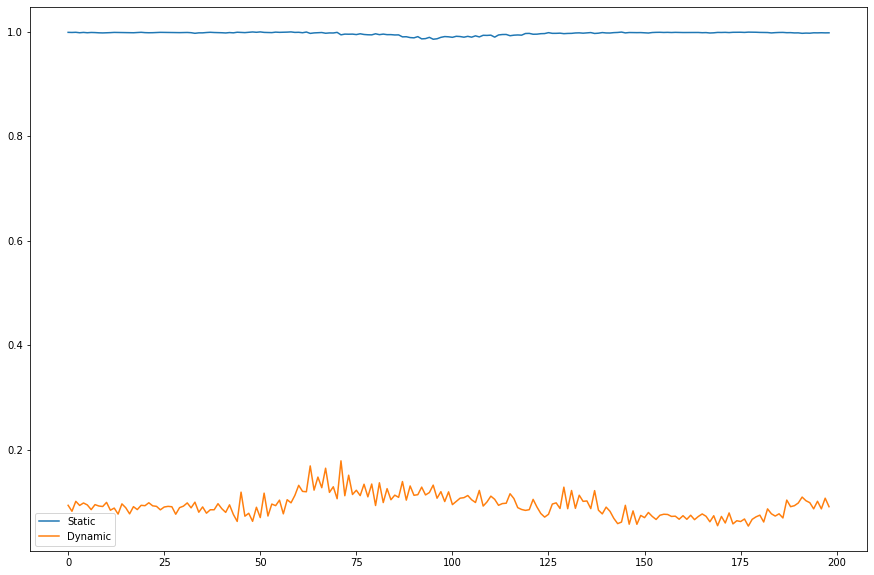

In [19]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

In [20]:
data.shape

(200, 100, 100)

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

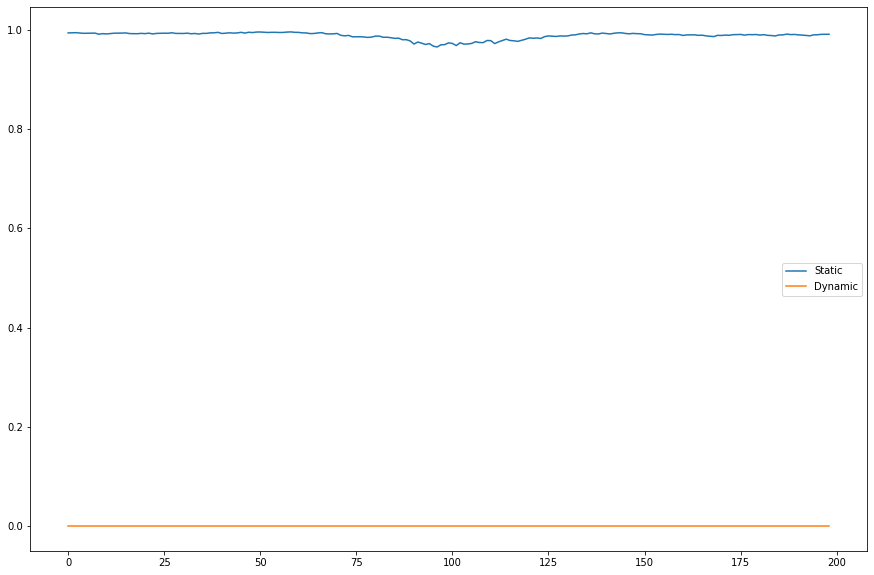

In [21]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

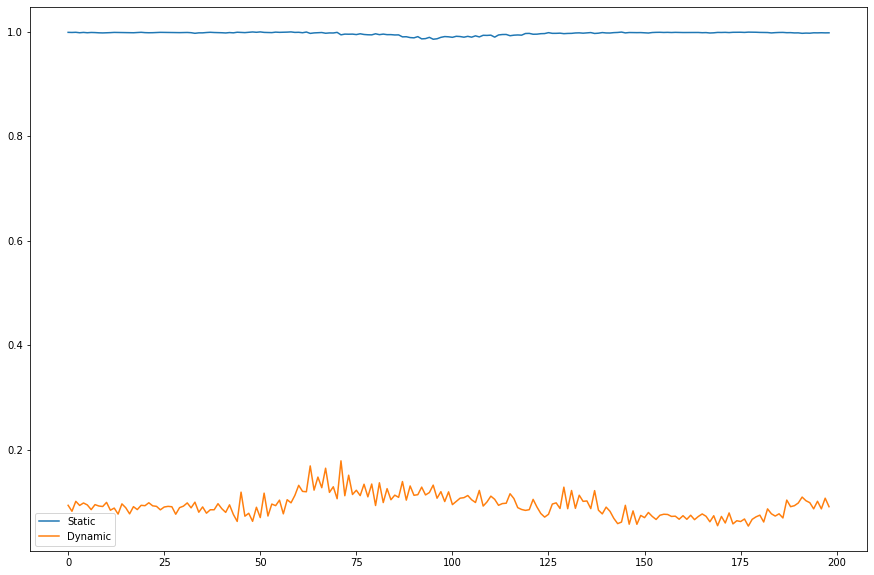

In [22]:
test2.plot()